In [1]:
using Plots
gr(size=(600,400))
plot(rand(3),rand(3))
scatter!(rand(3),rand(3))
nothing

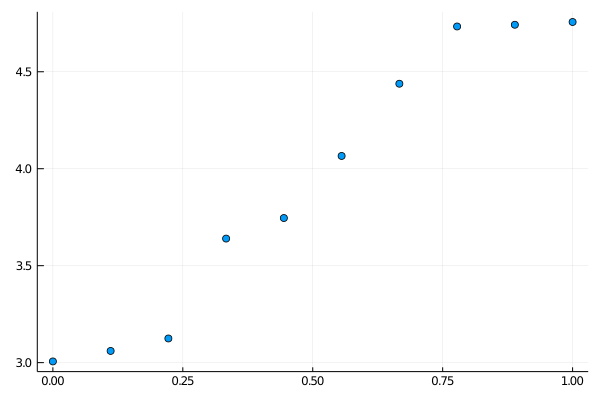

In [2]:
n = 10
x = range(0, 1, length=n)
y = 2x .+ 3 + randn(n) * 0.2

scatter(x, y, leg=false)

In [3]:
E(β₀, β₁) = sum((y[i] - β₀ - β₁ * x[i])^2 for i = 1:n) / 2

E (generic function with 1 method)

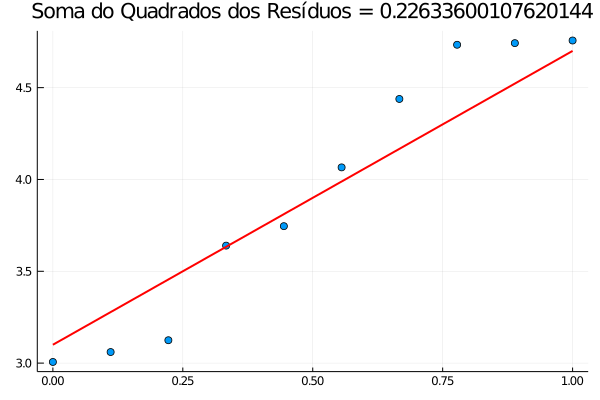

In [4]:
β₀ = 3.1
β₁ = 1.6

scatter(x, y, leg=false)
plot!(x -> β₀ + β₁ * x, extrema(x)..., c=:red, lw=2)
title!("Soma do Quadrados dos Resíduos = $(E(β₀, β₁))")

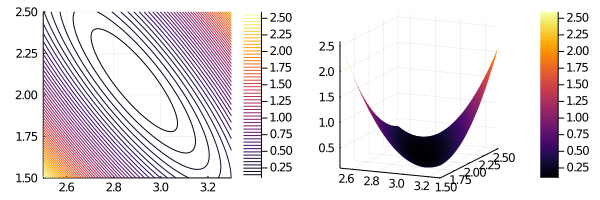

In [5]:
β₀range = range(2.5, 3.3, length=100)
β₁range = range(1.5, 2.5, length=100)
p = contour(β₀range, β₁range, E, levels=50, layout=(1,2), size=(600,200))
surface!(p[2], β₀range, β₁range, E)

In [6]:
M = [n  sum(x); sum(x)  sum(x .^ 2)]
c = [sum(y); sum(x .* y)]

βsol = M \ c

2-element Array{Float64,1}:
 2.887056194078107
 2.0884779669826283

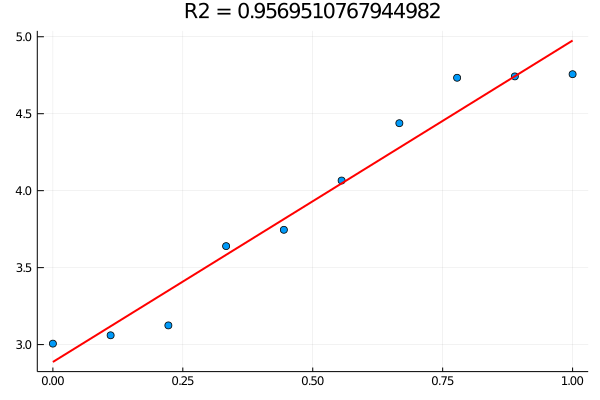

In [7]:
using Statistics

SQR = sum( (y .- βsol[1] - βsol[2] * x).^2 )
ST = sum( (y .- mean(y)).^2 ) 
R2 = 1 - SQR / ST
scatter(x, y, leg=false)
plot!(x -> βsol[1] + βsol[2] * x, extrema(x)..., c=:red, lw=2)
title!("R2 = $R2")

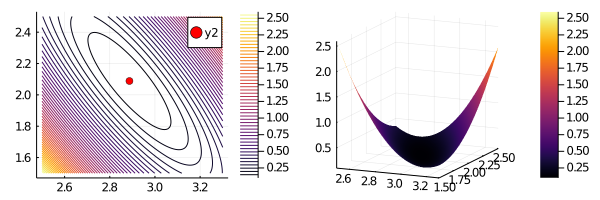

In [8]:
β₀range = range(2.5, 3.3, length=100)
β₁range = range(1.5, 2.5, length=100)
p = contour(β₀range, β₁range, E, levels=50, layout=(1,2), size=(600,200))
scatter!(p[1], [βsol[1]], [βsol[2]], c=:red)
surface!(p[2], β₀range, β₁range, E)

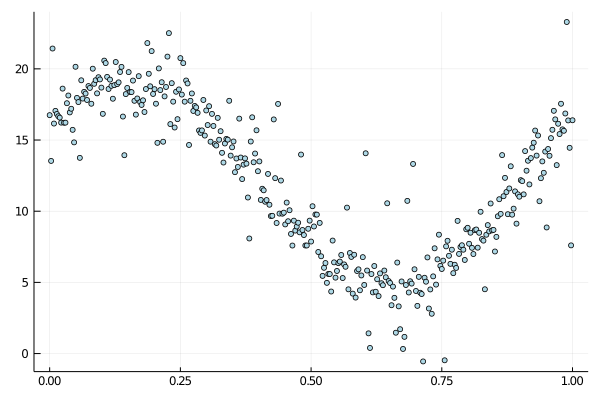

In [9]:
using Random
Random.seed!(0)

# Gerando dados fictícios para teste
n = 365
t = range(0, 1, length=n)

ϕ1(t) = sin(2π * t)
ϕ2(t) = cos(2π * t)
ϕ3(t) = 1.0

y = 6 * ϕ1.(t) + 4 * ϕ2.(t) + 12*ϕ3.(t) + randn(n)*1.1 +
    [rand() < 0.2 ? randn() * 3.5 : 0.0 for i = 1:n]

scatter(t, y, c=:lightblue, ms=3, leg=false)

In [10]:
M = zeros(3,3)
M[1,1] = sum(ϕ1(t[i]) * ϕ1(t[i]) for i = 1:n)
M[1,2] = sum(ϕ1(t[i]) * ϕ2(t[i]) for i = 1:n)
M[1,3] = sum(ϕ1(t[i]) * ϕ3(t[i]) for i = 1:n)
M[2,1] = M[1,2]
M[2,2] = sum(ϕ2(t[i]) * ϕ2(t[i]) for i = 1:n)
M[2,3] = sum(ϕ2(t[i]) * ϕ3(t[i]) for i = 1:n)
M[3,1] = M[1,3]
M[3,2] = M[2,3]
M[3,3] = sum(ϕ3(t[i]) * ϕ3(t[i]) for i = 1:n)

c = zeros(3)
c[1] = sum(y[i] * ϕ1(t[i]) for i = 1:n)
c[2] = sum(y[i] * ϕ2(t[i]) for i = 1:n)
c[3] = sum(y[i] * ϕ3(t[i]) for i = 1:n)

β = M \ c

3-element Array{Float64,1}:
  5.916093641802321
  3.953683742081815
 12.007860790666506

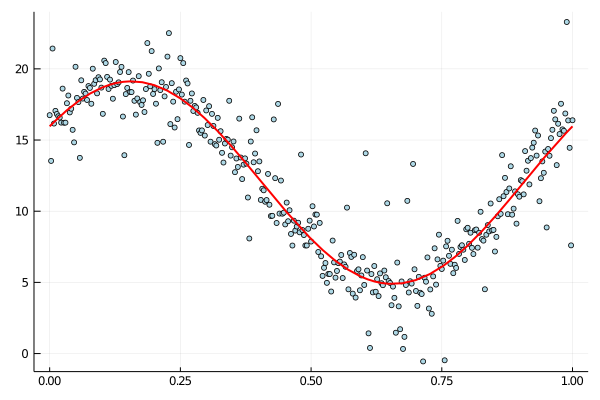

In [11]:
scatter(t, y, c=:lightblue, ms=3, leg=false)
plot!(t -> β[1] * ϕ1(t) + β[2] * ϕ2(t) + β[3] * ϕ3(t),
        extrema(t)..., c=:red, lw=2)

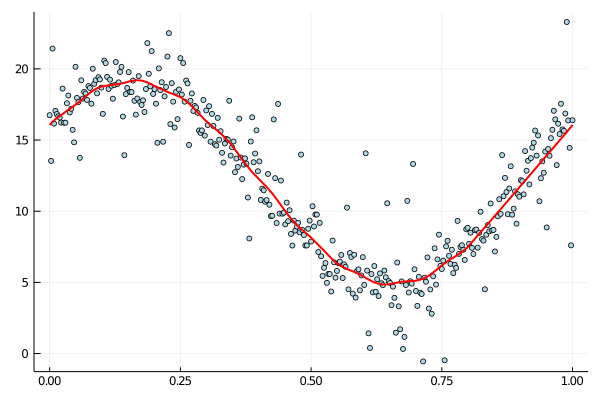

In [12]:
# F = [ϕ₁, ϕ₂, ϕ₃, …, ϕₚ]
F = [t -> sin(2π * t), t -> cos(2π * t), t -> 1.0,
     t -> sin(12 * 2π * t), t -> cos(12 * 2π * t)
    ]
p = length(F)
M = zeros(p, p)
c = zeros(p)
for j = 1:p
    for k = 1:p
        M[j,k] = sum(F[j](t[i]) * F[k](t[i]) for i = 1:n)
    end
    c[j] = sum(y[i] * F[j](t[i]) for i = 1:n)
end
β = M \ c
h(t) = sum(F[j](t) * β[j] for j = 1:p)

scatter(t, y, c=:lightblue, ms=3, leg=false)
plot!(h, extrema(t)..., c=:red, lw=2)

In [13]:
function quadmin(x, y, F)
    n = length(x)
    p = length(F)
    M = zeros(p, p)
    c = zeros(p)
    for j = 1:p
        for k = 1:p
            M[j,k] = sum(F[j](x[i]) * F[k](x[i]) for i = 1:n)
        end
        c[j] = sum(y[i] * F[j](x[i]) for i = 1:n)
    end
    β = M \ c
    h(x) = sum(F[j](x) * β[j] for j = 1:p)
    return β, h
end

quadmin (generic function with 1 method)

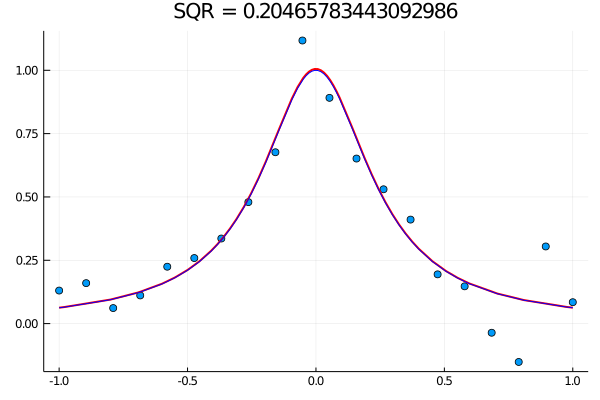

In [14]:
using LinearAlgebra, Random
Random.seed!(0)
n = 20
x = range(-1, 1, length=n)
y = 1 ./ (1 .+ 15 * x.^2) + randn(n) * 0.1
real(x) = 1 ./ (1 .+ 15 * x.^2)

scatter(x, y, leg=false)

# F = [x -> 1.0, x -> x, x -> x^2, x -> x^3, x -> x^4, x -> x^5,
#     x -> x^6, x -> x^7, x -> x^8, x -> x^10, x -> x^12, x -> x^14,
#     x -> x^16, x -> x^18, x -> x^20]
# F = [x -> x^j for j = 0:14]
# F = [x -> exp(-k * x^2) for k = 1:20]
F = [x -> 1 / (1 + 15x^2)]
β, modelo = quadmin(x, y, F)
r = y - modelo.(x)
SQR = norm(r)^2
plot!(modelo, extrema(x)..., c=:red, lw=2)
plot!(real, extrema(x)..., c=:blue)
title!("SQR = $SQR")

---

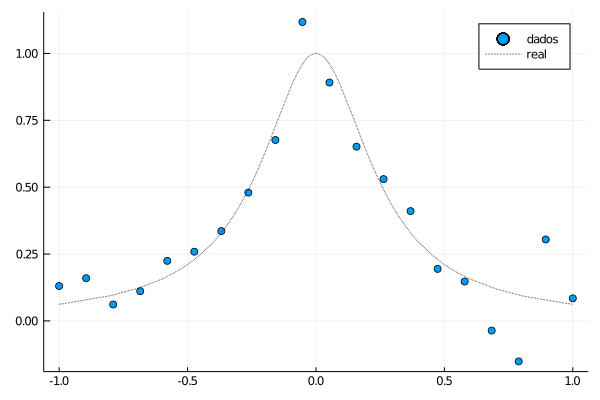

In [15]:
using LinearAlgebra, Random
Random.seed!(0)
n = 20
x = range(-1, 1, length=n)
real(x) = 1 ./ (1 .+ 15 * x.^2)
y = real.(x) + randn(n) * 0.1

scatter(x, y, lab="dados")
plot!(real, extrema(x)..., c=:black, l=:dot, lab="real")

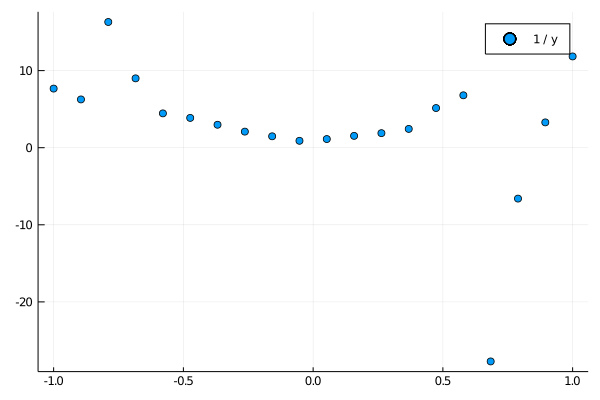

In [16]:
scatter(x, 1 ./ y, lab="1 / y")

In [17]:
#F = [x -> 1, x -> x, x -> x^2]
# F = [x -> 1, x -> x^2]
F = [x -> x^2]
β, modelo_inv = quadmin(x, 1 ./ y, F)

([6.429164954044311], var"#h#52"{Array{var"#56#57",1},Int64,Array{Float64,1}}([var"#56#57"()], 1, [6.429164954044311]))

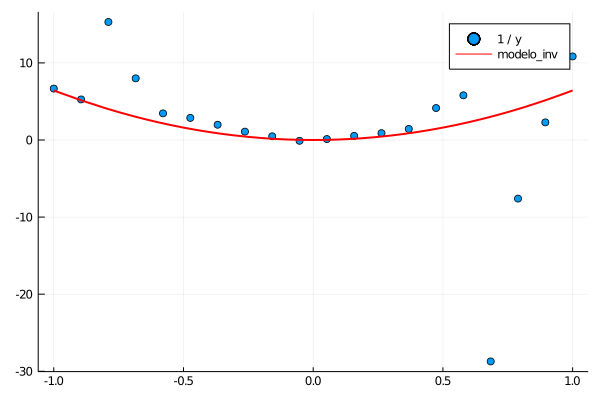

In [18]:
scatter(x, 1 ./ y .- 1, lab="1 / y")
plot!(modelo_inv, extrema(x)..., c=:red, lw=2, lab="modelo_inv")

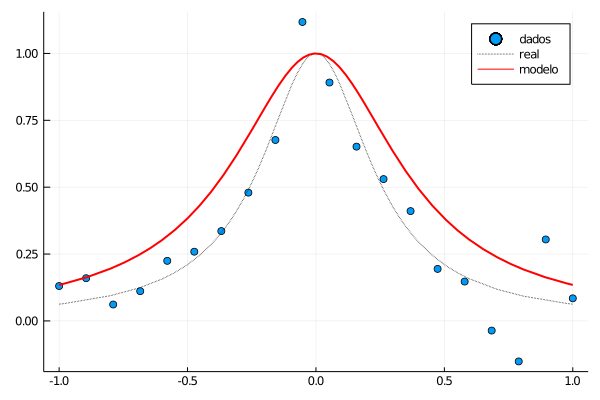

In [19]:
scatter(x, y, lab="dados")
plot!(real, extrema(x)..., c=:black, l=:dot, lab="real")
plot!(x -> 1 / (1 + modelo_inv(x)), extrema(x)..., c=:red, lw=2, lab="modelo")

## Bolo

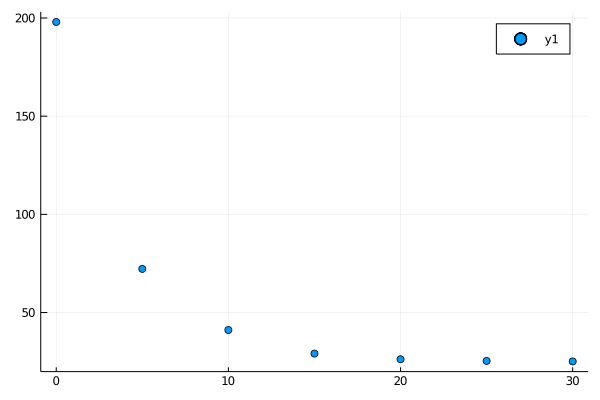

In [20]:
t = 0:5:30
n = length(t)
Ta = 25
T = Ta .+ 175 * exp.(-0.25 * t + randn(n) * 0.1)
scatter(t, T)

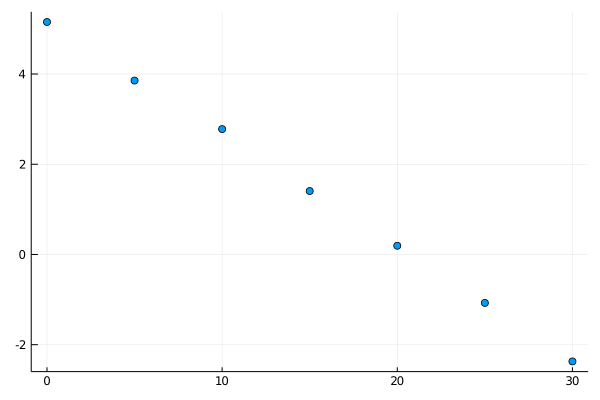

In [21]:
scatter(t, log.(T .- Ta), leg=false)

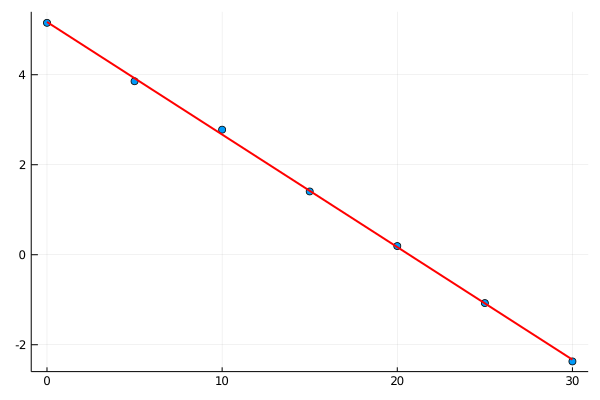

In [22]:
β, modelo = quadmin(t, log.(T .- Ta), [x -> 1, x -> x])
scatter(t, log.(T .- Ta), leg=false)
plot!(modelo, extrema(t)..., c=:red, lw=2)

In [23]:
modelo.(t)

7-element Array{Float64,1}:
  5.171758068308029
  3.9211877197576355
  2.670617371207242
  1.4200470226568482
  0.16947667410645462
 -1.081093674443939
 -2.3316640229943326

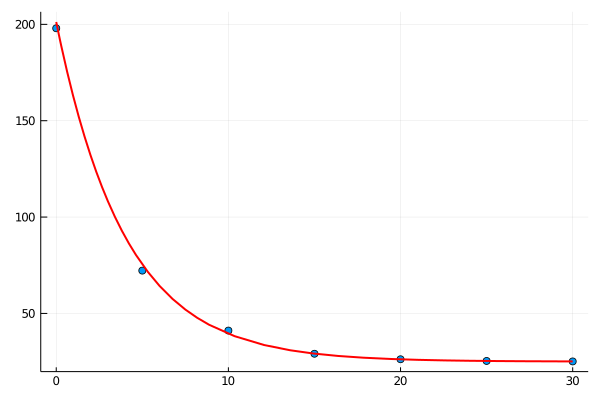

In [24]:
α = [exp(β[1]); β[2]]
scatter(t, T, leg=false)
plot!(t -> Ta + α[1] * exp(α[2] * t), extrema(t)..., c=:red, lw=2)

## R2

In [25]:
function regressao_polinomial(x, y, p)
    F = [x -> 1; [x -> x^j for j = 1:p]]
    quadmin(x, y, F)
end

regressao_polinomial (generic function with 1 method)

In [26]:
using Random, Statistics
Random.seed!(0)
m = 10
x = range(-3, 7, length=m)
y = 1.9 .+ 0.01*x + randn(m)*0.0001 # Gerando pontos aleatórios

M = [m sum(x); sum(x) dot(x,x)]
b = [sum(y); dot(x,y)]
α = M \ b
p = 1
α, modelo = regressao_polinomial(x, y, p)

y_pred = modelo.(x)
y_med = mean(y)

1.9200291966253693

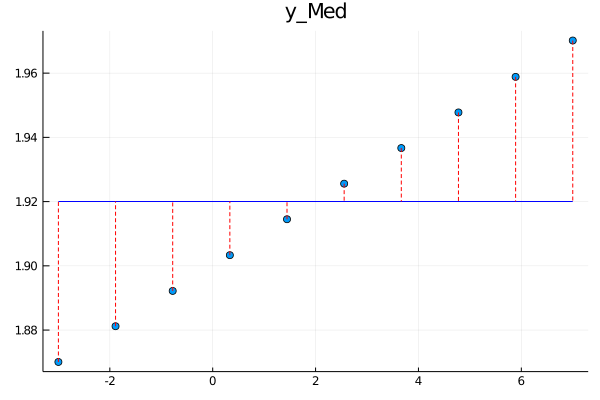

In [27]:
scatter(x, y, leg=false)
plot!([x[1], x[end]], [y_med, y_med], c=:blue)
for i = 1:m
    plot!([x[i], x[i]], [y[i], y_med], c=:red, l=:dash)
end
title!("y_Med")

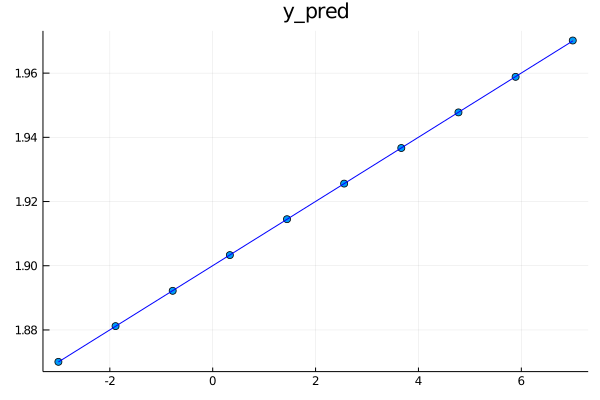

In [28]:
scatter(x, y, leg=false)
#plot!(x, y_pred, c=:blue)
xlin = range(x[1], x[end], length=100)
ylin = α[1] .+ sum(α[j+1] * xlin.^j for j = 1:p)
plot!(xlin, ylin, c=:blue)
for i = 1:m
    plot!([x[i], x[i]], [y[i], y_pred[i]], c=:red, l=:dash)
end
title!("y_pred")

In [29]:
R2 = 1 - norm(y_pred - y)^2 / norm(y_med .- y)^2

0.9999964368088414

## Validação Cruzada

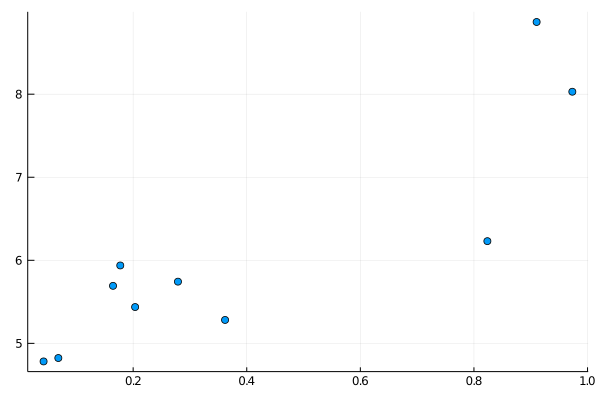

In [30]:
Random.seed!(0)
m = 10
x = sort(rand(m))
y = 3x .+ 5 + randn(m) * 0.5
scatter(x, y, leg=false)

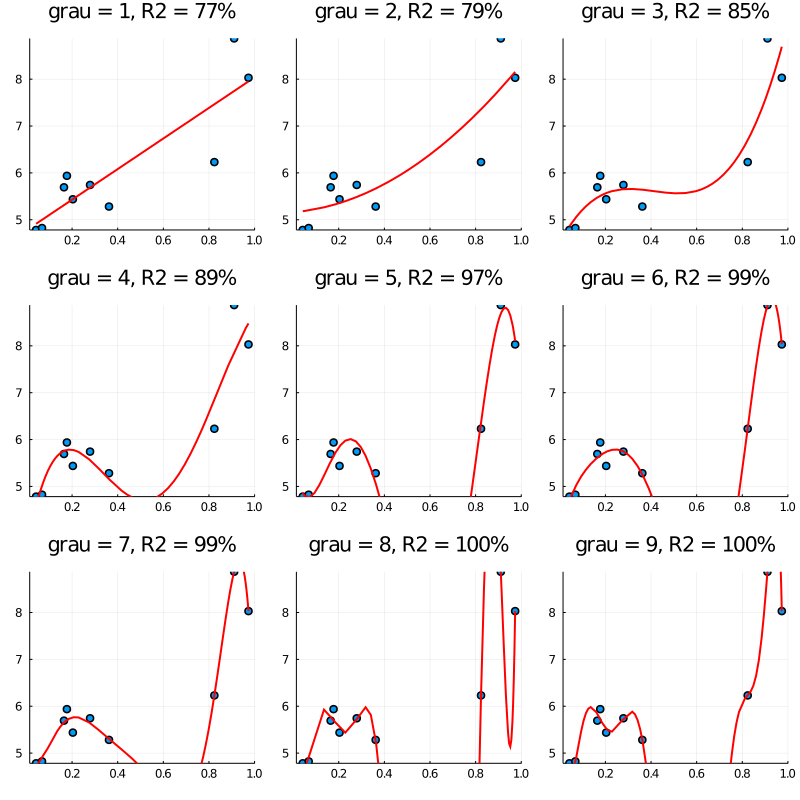

In [31]:
p = plot(;leg=false, layout=(3,3), size=(800,800))
grau = 1
for i = 1:3, j = 1:3
    β, modelo = regressao_polinomial(x, y, grau)
    scatter!(p[grau], x, y, leg=false)
    plot!(p[grau], modelo, extrema(x)..., lw=2, c=:red)
    ylims!(p[grau], extrema(y)...)
    
    res = y - modelo.(x)
    R2 = 1 - norm(res)^2 / norm(y .- mean(y))^2
    R2 = round(Int, 100R2)
    title!(p[grau], "grau = $grau, R2 = $R2%")
    grau += 1
end
p

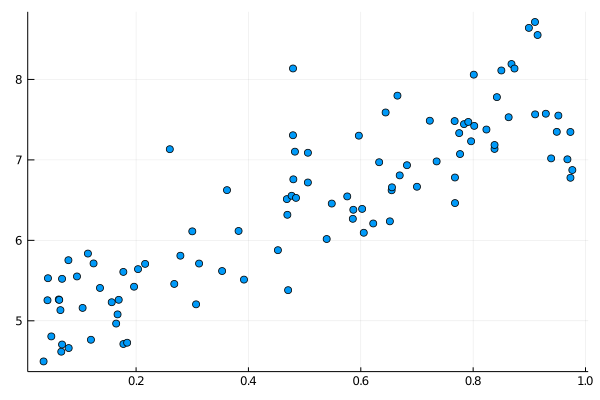

In [32]:
Random.seed!(0)
m = 100
x = sort(rand(m))
y = 3x .+ 5 + randn(m) * 0.5
scatter(x, y, leg=false)

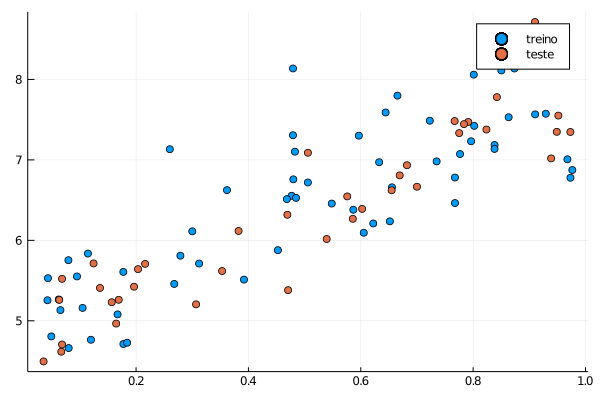

In [37]:
Iset = shuffle(1:m)
Itr = Iset[1:60]
Ite = Iset[61:end]

scatter(x[Itr], y[Itr], lab="treino")
scatter!(x[Ite], y[Ite], lab="teste")

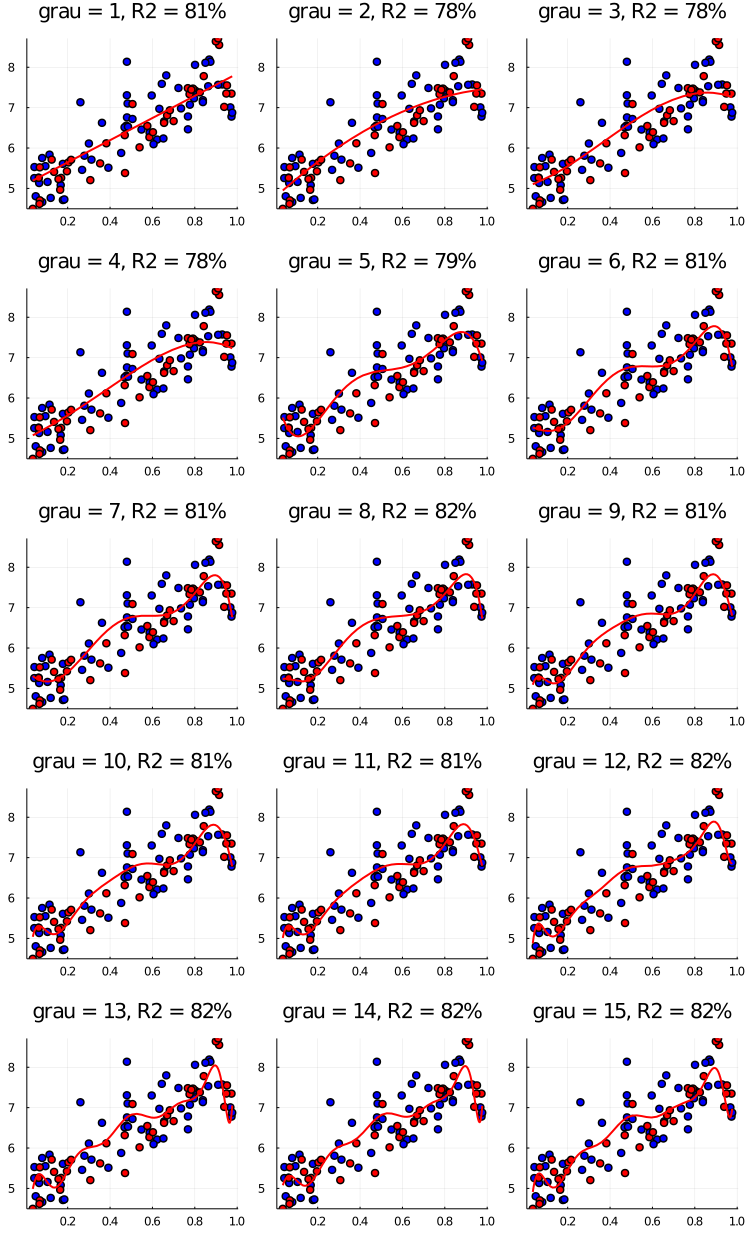

In [38]:
linhas = 5
cols = 3
p = plot(;leg=false, layout=(linhas,cols), size=(250*cols,250*linhas))
grau = 1
for i = 1:linhas, j = 1:cols
    β, modelo = regressao_polinomial(x[Itr], y[Itr], grau)
    scatter!(p[grau], x[Itr], y[Itr], leg=false, c=:blue)
    scatter!(p[grau], x[Ite], y[Ite], leg=false, c=:red)
    plot!(p[grau], modelo, extrema(x)..., lw=2, c=:red)
    ylims!(p[grau], extrema(y)...)
    
    res = y[Ite] - modelo.(x[Ite])
    R2 = 1 - norm(res)^2 / norm(y[Ite] .- mean(y[Ite]))^2
    R2 = round(Int, 100R2)
    title!(p[grau], "grau = $grau, R2 = $R2%")
    grau += 1
end
p

In [47]:
function r2(yreal, ypred)
    sqr = norm(yreal - ypred)^2
    st  = norm(yreal .- mean(yreal))^2
    return 1 - sqr / st
end

r2 (generic function with 1 method)

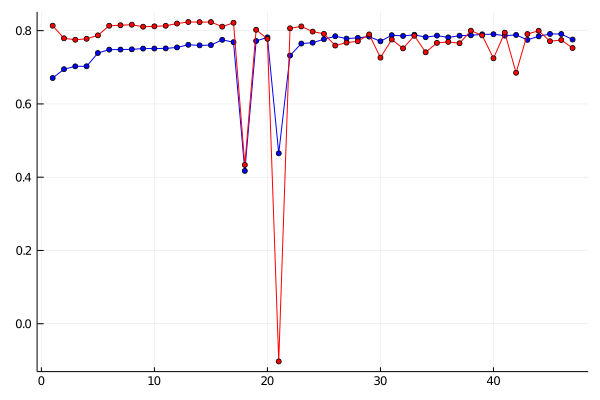

In [50]:
Etr = []
Ete = []
for grau = 1:47
    β, modelo = regressao_polinomial(x[Itr], y[Itr], grau)

    push!(Etr, r2(y[Itr], modelo.(x[Itr])))
    push!(Ete, r2(y[Ite], modelo.(x[Ite])))
end

plot(1:47, Etr, c=:blue, m=(3,:dot,:blue), leg=false)
plot!(1:47, Ete, c=:red, m=(3,:circle,:red))